# Exploring a Text with NLTK

This notebook shows how you can explore aspects of a text using the Natural Langauge Took Kit (NLTK).

Some of the things you can do include:

* [Tokenize a text](#Tokenization)
* [Generate a concordance for a word](#Concording)
* [Explore collocations (words that are located together)](#Collocations)
* [Counting words and frequencies](#Counting-Words-and-Frequencies)
* [Finding smiliar words and contexts](#Similar-Words)

For more on NLTK see the online version of the book [Natural Language Processing with Python](http://www.nltk.org/book/). 

## Preparing for Exploration

Before we can analyze a text we need to load it in and tokenize it.

### Installing NTLK

Before you can use NTLK you need to make sure it is installed. The [Anaconda Navigator](https://docs.continuum.io/anaconda/navigator) by default installs NLTK, but you can always test if it is installed by importing it with ```import nltk```. Try it. It will give you an error if you don't have it.

In [1]:
import nltk

### (more on) Installing NLTK

If you don't have it there are different ways to install it. 

* The NLTK 3.0 documentation has a page on [Installing NLTK](http://www.nltk.org/install.html).
* You can have Anaconda install or update it for you. See [Using Anaconda Navigator](https://docs.continuum.io/anaconda/navigator-using#) and scroll down to the part about updating packages. Basically you click on the check to the left of the package and pull down to "Mark for upgrade". Then click the Apply button below.

### Getting a Text

Now we will get a text to process with NLTK.

First we see what text files we have. 

In [2]:
ls *.txt

Hume Enquiry.txt   negative.txt       positive.txt
Hume Treatise.txt  obama_tweets.txt


We are going to use the "Hume Enquiry.txt" from the Gutenberg Project. You can use whatever text you want. We print the first 50 characters to check.

In [3]:
theText2Use = "Hume Enquiry.txt"
with open(theText2Use, "r") as fileToRead:
    theString = fileToRead.read()
    
print("This string has", len(theString), "characters.")
print(theString[:50])

This string has 366798 characters.
The Project Gutenberg EBook of An Enquiry Concerni


### Tokenization

Now we tokenize the text using NTLK's tokenizer producing a list called "listOfTokens" and check the first words. Note that the NTLK tokenizer doesn't eliminate punctuation and doesn't lower case the words. You can tokenize using another method if you want. Then we create a NLTK text object from the tokens. Note how the text <a href="Glossary.ipynb#Object" title="Data which has attributes or values AND a defined behaviour." >object </a> behaves like a list of tokens.

In [4]:
listOfTokens = nltk.word_tokenize(theString)
theText = nltk.Text(listOfTokens)
print(listOfTokens[:50])

['The', 'Project', 'Gutenberg', 'EBook', 'of', 'An', 'Enquiry', 'Concerning', 'Human', 'Understanding', ',', 'by', 'David', 'Hume', 'and', 'L.', 'A.', 'Selby-Bigge', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', '.', 'You', 'may', 'copy', 'it', ',', 'give', 'it', 'away', 'or', 're-use', 'it', 'under', 'the']


## Concording

Now we get a <a href="Glossary.ipynb#Concordance" title="A list of all words within a text and their frequency of occurrence." >concordance </a> for a word in one line. Note that we can control the width of the concordances. Edit the word to explore.

In [5]:
theText.concordance("the", width=100)

Displaying 25 of 3499 matches:
                                                The Project Gutenberg EBook of An Enquiry Concernin
                                                the use of anyone anywhere at no cost and with almo
u may copy it , give it away or re-use it under the terms of the Project Gutenberg License included
 , give it away or re-use it under the terms of the Project Gutenberg License included with this eB
AVID HUME Extracted from : Enquiries Concerning the Human Understanding , and Concerning the Princi
erning the Human Understanding , and Concerning the Principles of Morals , By David Hume . Reprinte
ples of Morals , By David Hume . Reprinted from The Posthumous Edition of 1777 , and Edited with In
 Oxford . Second Edition , 1902 CONTENTS I . Of the different Species of Philosophy II . Of the Ori
 Of the different Species of Philosophy II . Of the Origin of Ideas III . Of the Association of Ide
Philosophy II . Of the Origin of Ideas III . Of the Association of Id

Note that ```concordance``` is not case sensitive. This will give you a concordance of both capitalized and lower case words.

If you want more lines then you need to add a parameter.

In [6]:
theText.concordance("the", lines=30)

Displaying 30 of 3499 matches:
                                      The Project Gutenberg EBook of An Enquiry
d L. A. Selby-Bigge This eBook is for the use of anyone anywhere at no cost and
 it , give it away or re-use it under the terms of the Project Gutenberg Licens
 away or re-use it under the terms of the Project Gutenberg License included wi
Extracted from : Enquiries Concerning the Human Understanding , and Concerning 
 Human Understanding , and Concerning the Principles of Morals , By David Hume 
rals , By David Hume . Reprinted from The Posthumous Edition of 1777 , and Edit
Second Edition , 1902 CONTENTS I . Of the different Species of Philosophy II . 
fferent Species of Philosophy II . Of the Origin of Ideas III . Of the Associat
 II . Of the Origin of Ideas III . Of the Association of Ideas IV . Sceptical D
deas IV . Sceptical Doubts concerning the Operations of the Understanding V. Sc
l Doubts concerning the Operations of the Understanding V. Sceptical Solution o
e Doubts 

One thing that is annoying is that you can't easily save a <a href="Glossary.ipynb#Concordance" title="A list of all words within a text and their frequency of occurrence." >concordance </a> to a file and that is because the NLTK text <a href="Glossary.ipynb#Object" title="Data which has attributes or values AND a defined behaviour." >object </a> concordance is printed to the screen for exploration. You will need to cut and paste to a word processor to save this.

### Plot the Dispersion of Words

We can easily <a href="Glossary.ipynb#dispersionplot" title="A graph which uses cartesian coordinates to display values for multiple variables of a set of data." >plot </a> the dispersion of words through the text. Note how it is case sensitive.

The line ```%matplotlib inline``` makes sure that the plot is placed inline.

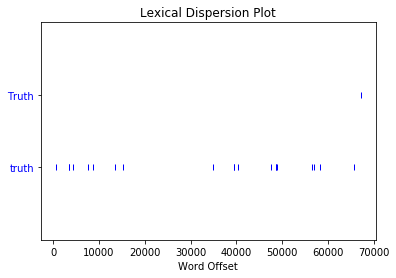

In [7]:
%matplotlib inline
theText.dispersion_plot(["Truth","truth"])

### Counting Words and Frequencies

You can also count words. This is case sensitive if you use the text <a href="Glossary.ipynb#Object" title="Data which has attributes or values AND a defined behaviour." >object. </a>

In [8]:
print(theText.count("Truth"), " ", theText.count("truth"))

1   20


To make it case insensitive we are going to use [list comprehension](http://python-3-patterns-idioms-test.readthedocs.io/en/latest/Comprehensions.html) to lowercase every token and get a new list of tokens. We are also going to get rid of punctuation using a parameter. Then we can count things in the list.

In [9]:
theLowerTokens = [token.lower() for token in listOfTokens if token[0].isalpha()]
print(theLowerTokens[:20])

['the', 'project', 'gutenberg', 'ebook', 'of', 'an', 'enquiry', 'concerning', 'human', 'understanding', 'by', 'david', 'hume', 'and', 'l.', 'a.', 'selby-bigge', 'this', 'ebook', 'is']


In [10]:
theLowerTokens.count("truth")

21

With NLTK we can get word frequencies. These can be displayed as a table. We can then do other things with the frequency distribution <a href="Glossary.ipynb#Object" title="Data which has attributes or values AND a defined behaviour." >object. </a>

In [11]:
theLowerFreqs = nltk.FreqDist(theLowerTokens)
theLowerFreqs.tabulate(15)

  the    of   and    to     a    in  that    is    it which    or    be    we    by  from 
 3499  2848  2210  1809  1165  1117  1002   955   786   750   711   674   663   564   529 


In [12]:
theLowerFreqs["truth"]

21

Rather than get the count we can get the relative frequency which is the count divided by the number of tokens.

In [13]:
theLowerFreqs.freq("the")

0.058443293803240356

## Plot the Frequency of Words
We can also plot the high frequency words.

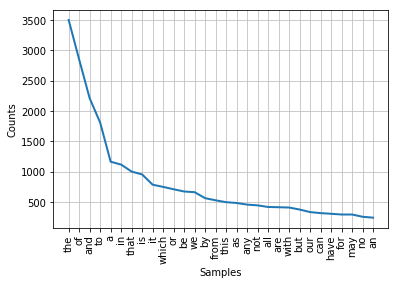

In [14]:
%matplotlib inline
theLowerFreqs.plot(30)

### Plotting Content Words

What if we want to see just the high frequency content words. Here we get the NLTK English <a href="Glossary.ipynb#stopwords" title="A list of words which are programmed to be ignored or filtered in analysis and search queries." >stop-word </a> list.

In [15]:
stopwords = nltk.corpus.stopwords.words("english")
print(stopwords[:20])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers']


We need to create a new list of tokens without the stopwords.

In [16]:
theLowerContentWords = [token for token in theLowerTokens if token not in stopwords]
theLowerContentWords[:10]

['project',
 'gutenberg',
 'ebook',
 'enquiry',
 'concerning',
 'human',
 'understanding',
 'david',
 'hume',
 'l.']

Now we can create a table of high frequency content words.

In [17]:
theLowerContFreqs = nltk.FreqDist(theLowerContentWords)
theLowerContFreqs.tabulate(10)

       may        one     nature       must         us experience      cause      human       mind      never 
       295        203        200        177        169        166        157        149        145        125 


If you still see words you want to remove then you need to remove them too. Note that this next <a href="Glossary.ipynb#cell" title="An input strucutre in a Notebook which runs either Markdown or Python code" >cell </a> updates what is in the <a href="Glossary.ipynb#Variable" title="A variable stores a piece of data and gives it a specific name" >variables </a> ```theLowerContentWords``` and ```theLowerContFreqs```. If you want to go recover the words you need to start **3.1** over.

In [18]:
moreStopwords = ["may","one","must","us","never","every"]
theLowerContentWords = [token for token in theLowerContentWords if token not in moreStopwords]
theLowerContFreqs = nltk.FreqDist(theLowerContentWords)
theLowerContFreqs.tabulate(10)

    nature experience      cause      human       mind     effect      ideas    objects       idea     reason 
       200        166        157        149        145        124        120        120        116        116 


And now we get the Frequency Distribution and plot it.

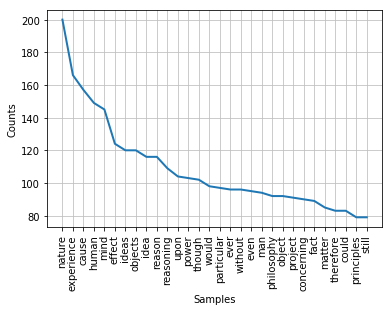

In [19]:
theLowerContFreqs.plot(30)

We might also want to check how these words are used by looking at their <a href="Glossary.ipynb#Concordance" title="A list of all words within a text and their frequency of occurrence." >concordance. </a>

In [20]:
theText.concordance("power", width=80, lines=5)

Displaying 5 of 103 matches:
 in the subdividing and balancing of power ; the lawyer more method and finer p
n , which not only escapes all human power and authority , but is not even rest
ceived ; nor is any thing beyond the power of thought , except what implies an 
 limits , and that all this creative power of the mind amounts to no more than 
o show distinctly the action of that power , which produces any single effect i


## Collocations, Similar Words, and Contexts

### Collocations

NLTK will also let you explore co-locating words by which is meant sets of two or more words that appear frequently together.

In [21]:
theText.collocations(10)

Project Gutenberg-tm; Project Gutenberg; Literary Archive; Gutenberg-
tm electronic; common life; Archive Foundation; electronic works;
Gutenberg Literary; sensible qualities; United States


Note how we are getting a lot of bigrams with "Gutenberg". That's because NLTK looks for bigrams where the words appear together more often than alone. If you ask for more collocations you can see some that have to do with the text.

In [22]:
theText.collocations(100)

Project Gutenberg-tm; Project Gutenberg; Literary Archive; Gutenberg-
tm electronic; common life; Archive Foundation; electronic works;
Gutenberg Literary; sensible qualities; United States; external
objects; human nature; set forth; human testimony; voluntary actions;
electronic work; necessary connexion; public domain; secret powers;
Gutenberg-tm License; regular conjunction; human life; _in infinitum_;
reasonings concerning; usual attendant; one object; constantly
conjoined; David Hume; universally allowed; human understanding; seems
evident; concerning matter; Human Understanding; copyright holder;
take place; simple ideas; real existence; every moment; may observe;
shall find; certain degree; infinitely less; CONCERNING HUMAN; ENQUIRY
CONCERNING; HUMAN UNDERSTANDING; PROJECT GUTENBERG; past experience;
Enquiry Concerning; one event; give rise; good fortune; conjoined
together; human actions; customary transition; infinite number; must
confess; constant conjunction; common sense; n

### Similar Words

We can get words that are **similar** to target words. These are not synonyms but words being used in similar contexts. You can use this to expland on a word you are interested in.

In [23]:
theText.similar("truth")

cause reason nature men it ideas necessity mankind action objects
conduct them body power experience resemblance first miracles science
life


You can use this to get concordances of sets of similar words.

In [24]:
listOfWords2Conc = ["reason","fact","knowledge","ideas"]
for i in listOfWords2Conc:
    print(i.upper() + ": ")
    theText.concordance(i, width=80, lines=5)
    print("--------------------------------------------------\n")

REASON: 
Displaying 5 of 116 matches:
Of Liberty and Necessity IX . Of the Reason of Animals X . Of Miracles XI . Of a
eigns . 7 . But is this a sufficient reason , why philosophers should desist fro
iscover the proper province of human reason . For , besides , that many persons 
er parts of nature . And there is no reason to despair of equal success in our e
RT I . 20 . All the objects of human reason or enquiry may naturally be divided 
--------------------------------------------------

FACT: 
Displaying 5 of 89 matches:
tainty and evidence . 21 . Matters of fact , which are the second objects of hum
ing . The contrary of every matter of fact is still possible ; because it can ne
s of any real existence and matter of fact , beyond the present testimony of our
. All reasonings concerning matter of fact seem to be founded on the relation of
a man , why he believes any matter of fact , which is absent ; for instance , th
--------------------------------------------------

KNOWLEDGE: 
D

### Common Contexts

NLTK can give us common contexts for words that share them.

In [25]:
theText.common_contexts(["nature", "experience"],10)

human_it from_and of_are in_and of_but this_he by_that of_which of_in
the_and


## Finding Patterns

We can use <a href="Glossary.ipynb#regularexpressions" title="The sequence of characters which define a search pattern." >regular expressions </a> on tokens with the ```findall``` method of the Text <a href="Glossary.ipynb#Object" title="Data which has attributes or values AND a defined behaviour." >object. </a> Some guidelines:

* You are matching to tokens, not the raw text. The < and > indicates the token.
* ```<.*>``` matches any token as ```.``` means any character and ```*``` means 0 or more of. ```?``` would mean 
* The parantheses tell IPython what to show from the match. In the first example below you can see how to show all the words right before the word you want.

Here are some examples.

In [26]:
theText.findall("(<.*>)<experience>")

and; from; by; by; to; without; by; not; and; ,; assist; by; to; from;
have; that; this; past; from; from; of; to; of; of; by; from; all;
from; past; by; from; more; more; this; his; from; from; and; of; and;
pure; is; farther; of; our; from; daily; any; and; from; without;
from; by; besides; of; from; And; common; by; we; by; except; certain;
by; and; and; fancied; of; by; without; have; this; have; this;
uniform; and; that; of; no; and; past; past; the; our; seeming; from;
and; not; even; past; greater; 's; and; Though; to; of; infallible;
past; our; by; past; the; from; this; of; uniform; his; have; uniform;
unalterable; from; uniform; uniform; no; we; regular; is; same; of;
the; and; from; past; my; human; make; same; by; in; other; from; of;
If; By; here; any; from; our; and; on; only; by; from; from; by; from;
long; by; from; from; and; of; by; uniform; and; of; by; .; to; for;
only; from; .


In [27]:
theText.findall("<.*><.*><nature>")

of human nature; regard human nature; , that nature; into the nature;
of human nature; derived from nature; parts of nature; concerning
human nature; limits of nature; , where nature; concerning their
nature; triangle in nature; a like nature; is the nature; the same
nature; of this nature; concerning the nature; course of nature;
course of nature; laws of nature; discover in nature; established by
nature; is the nature; , that nature; of their nature; course of
nature; of human nature; similarity which nature; Of what nature;
course of nature; learned the nature; Their secret nature; and
transitory nature; as human nature; of human nature; priori_ the
nature; of human nature; of human nature; of this nature; accurately
the nature; excited by nature; the whole nature; the peculiar nature;
observed that nature; the same nature; a similar nature; course of
nature; works of nature; wisdom of nature; . As nature; the very
nature; contrivance of nature; constitutes the nature; irregularity 

In [28]:
theText.findall("(<.*><.*>)<truth>")

talk of; is a; and a; , and; of their; the same; love of; . The;
discovery of; for the; for the; inclination to; distinguish between;
violation of; violations of; depart from; to reach; _criteria_ of;
with great; love of


In [29]:
theText.findall("<not><.*>?<true>")

not universally true; not a true; not true


---
[CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0/) From [The Art of Literary Text Analysis](../ArtOfLiteraryTextAnalysis.ipynb) by [Stéfan Sinclair](http://stefansinclair.name) &amp; [Geoffrey Rockwell](http://geoffreyrockwell.com). Edited and revised by [Melissa Mony](http://melissamony.com). <br >Created October 10th, 2016 (Jupyter 4.2.1)